# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv',index_col=False)

In [6]:
df_data


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape

(4324, 9)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

FINDING NULL VALUES - RESULTS SHOWS IN PRICE COLUMN

In [10]:
df_data.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

FIND DUPLICATED ROWS - RESULTS NONE

In [11]:
df_data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [12]:
df_data=df_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [13]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## DATE PROCESSING - FORMATE THE DATES 

In [14]:
df_data['Date Time']=pd.to_datetime(df_data['Date'])

In [15]:
#getting the launch year
df_data['Year']=df_data['Date Time'].apply(lambda datetime:datetime.year)

In [16]:
#getting the launch month
df_data['Month']=df_data['Date'].apply(lambda Date:Date.split()[1])

In [17]:
#getting the launch day
df_data['Day']=df_data['Date'].apply(lambda Day: Day.split()[0])

In [18]:
#getting the launch country
df_data['Country']=df_data['Location'].apply(lambda country: country.split(", ")[-1])

In [19]:
#checking country values and prepare to clean up
df_data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
Barents Sea                          3
South Korea                          3
Brazil                               3
Gran Canaria                         2
Yellow Sea                           1
Shahrud Missile Test Site            1
Pacific Missile Range Facility       1
Name: Country, dtype: int64

In [20]:
list_countries = {'Gran Canaria':'USA', 
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'USA', 
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of', 
                'Yellow Sea': 'China',
                  'Yellow Sea': 'China',
                'New Mexico': 'USA',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': "Korea, Democratic People's Republic of",
                'Pacific Ocean': 'United States Minor Outlying Islands',
                 'South Korea': 'Korea, Republic of',
                 ' USA':'USA',
                 ' China':'China'}
for country in list_countries:
    df_data.Country=df_data.Country.replace(country,list_countries[country])

In [21]:
df_data['Country'].value_counts()

Russian Federation                        1398
USA                                       1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
United States Minor Outlying Islands        36
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Brazil                                       3
Korea, Republic of                           3
Name: Country, dtype: int64

In [22]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date Time,Year,Month,Day,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,Aug,Fri,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,Aug,Thu,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,Aug,Tue,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Jul,Thu,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,Jul,Thu,USA


In [23]:
df_data['Price']=df_data['Price']

In [24]:
df_data.isnull().sum()


Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Date Time            0
Year                 0
Month                0
Day                  0
Country              0
dtype: int64

In [25]:
df_data['Price']=pd.to_numeric(df_data["Price"], errors='coerce')

## Descriptive Statistics

In [26]:
average=df_data['Price'].mean()
average

129.79523709167552

In [27]:
median=df_data['Price'].median()
median

62.0

In [28]:
standard_deviation=df_data['Price'].std()
standard_deviation

143.2203233531596

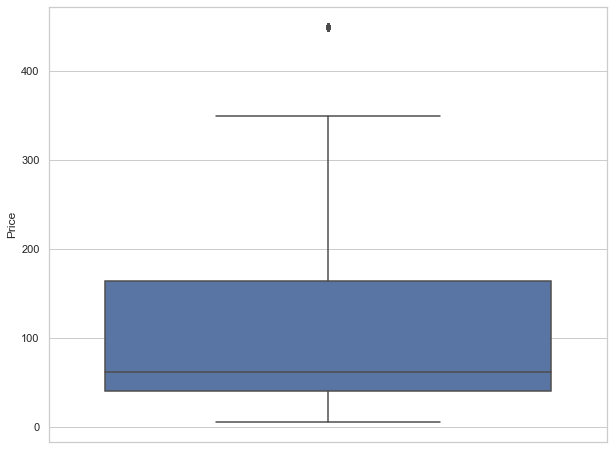

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
ax=sns.boxplot(y='Price',data=df_data,orient='v')

<AxesSubplot:xlabel='Price', ylabel='Count'>

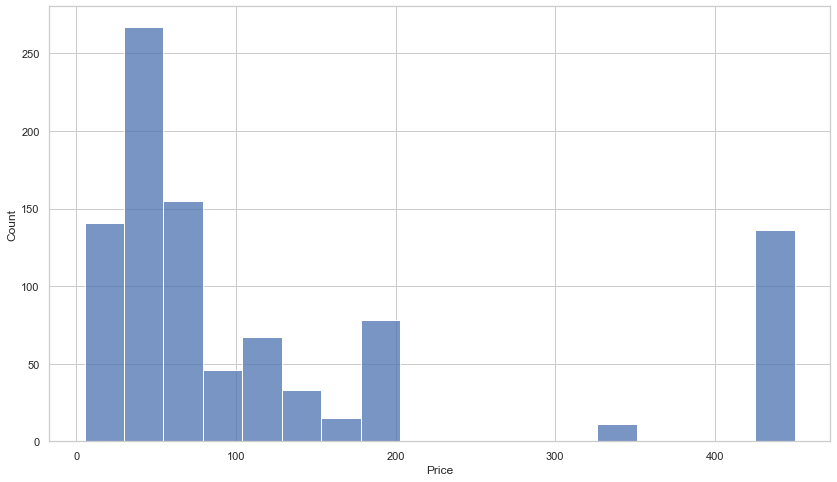

In [30]:
plt.figure(figsize=(14,8))
sns.histplot(df_data['Price'], kde=False)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

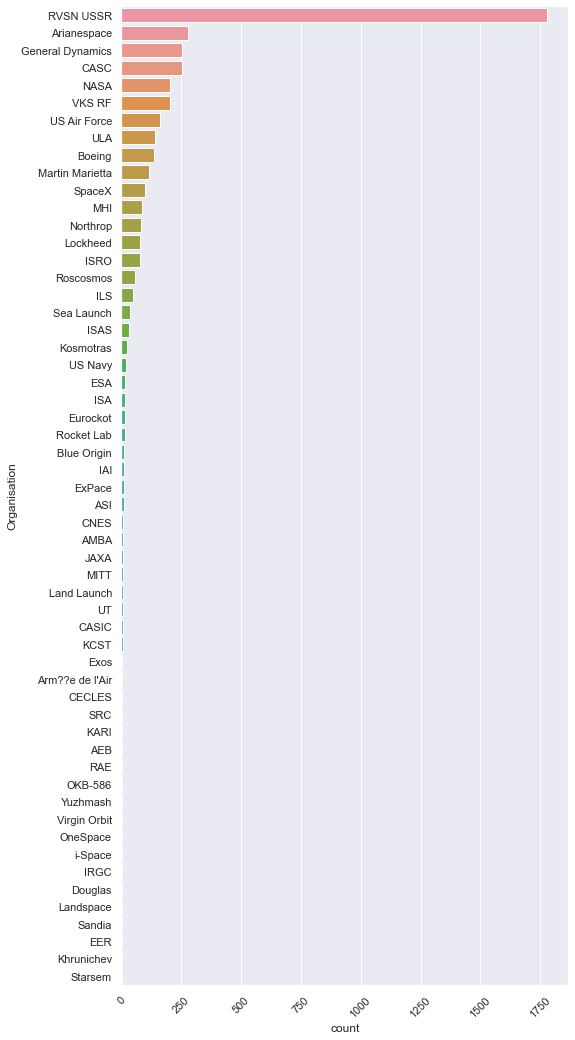

In [31]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,18))
plt.xticks(rotation=45)
ax = sns.countplot(y='Organisation',order=df_data['Organisation'].value_counts().index, data=df_data)


###We can see that Soviet/ Russian, American and Chinese agencies are at the top of the list. This is obvious as they have launched the maximum number of rockets.

# launch by country

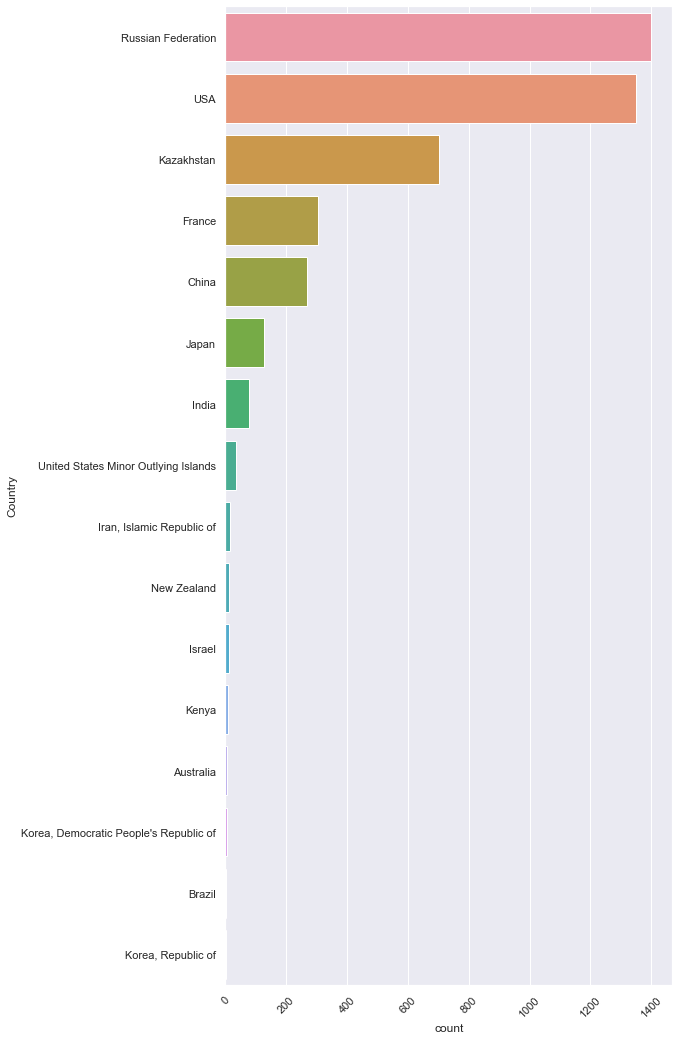

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,18))
plt.xticks(rotation=45)
ax = sns.countplot(y='Country',order=df_data['Country'].value_counts().index, data=df_data)



This statistic is also very simple and easy to understand. US, China and the USSR/ Russia are at the top again. There are also many launches from France, Japan and India.

# launch by location

/Users/YingLuo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/YingLuo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


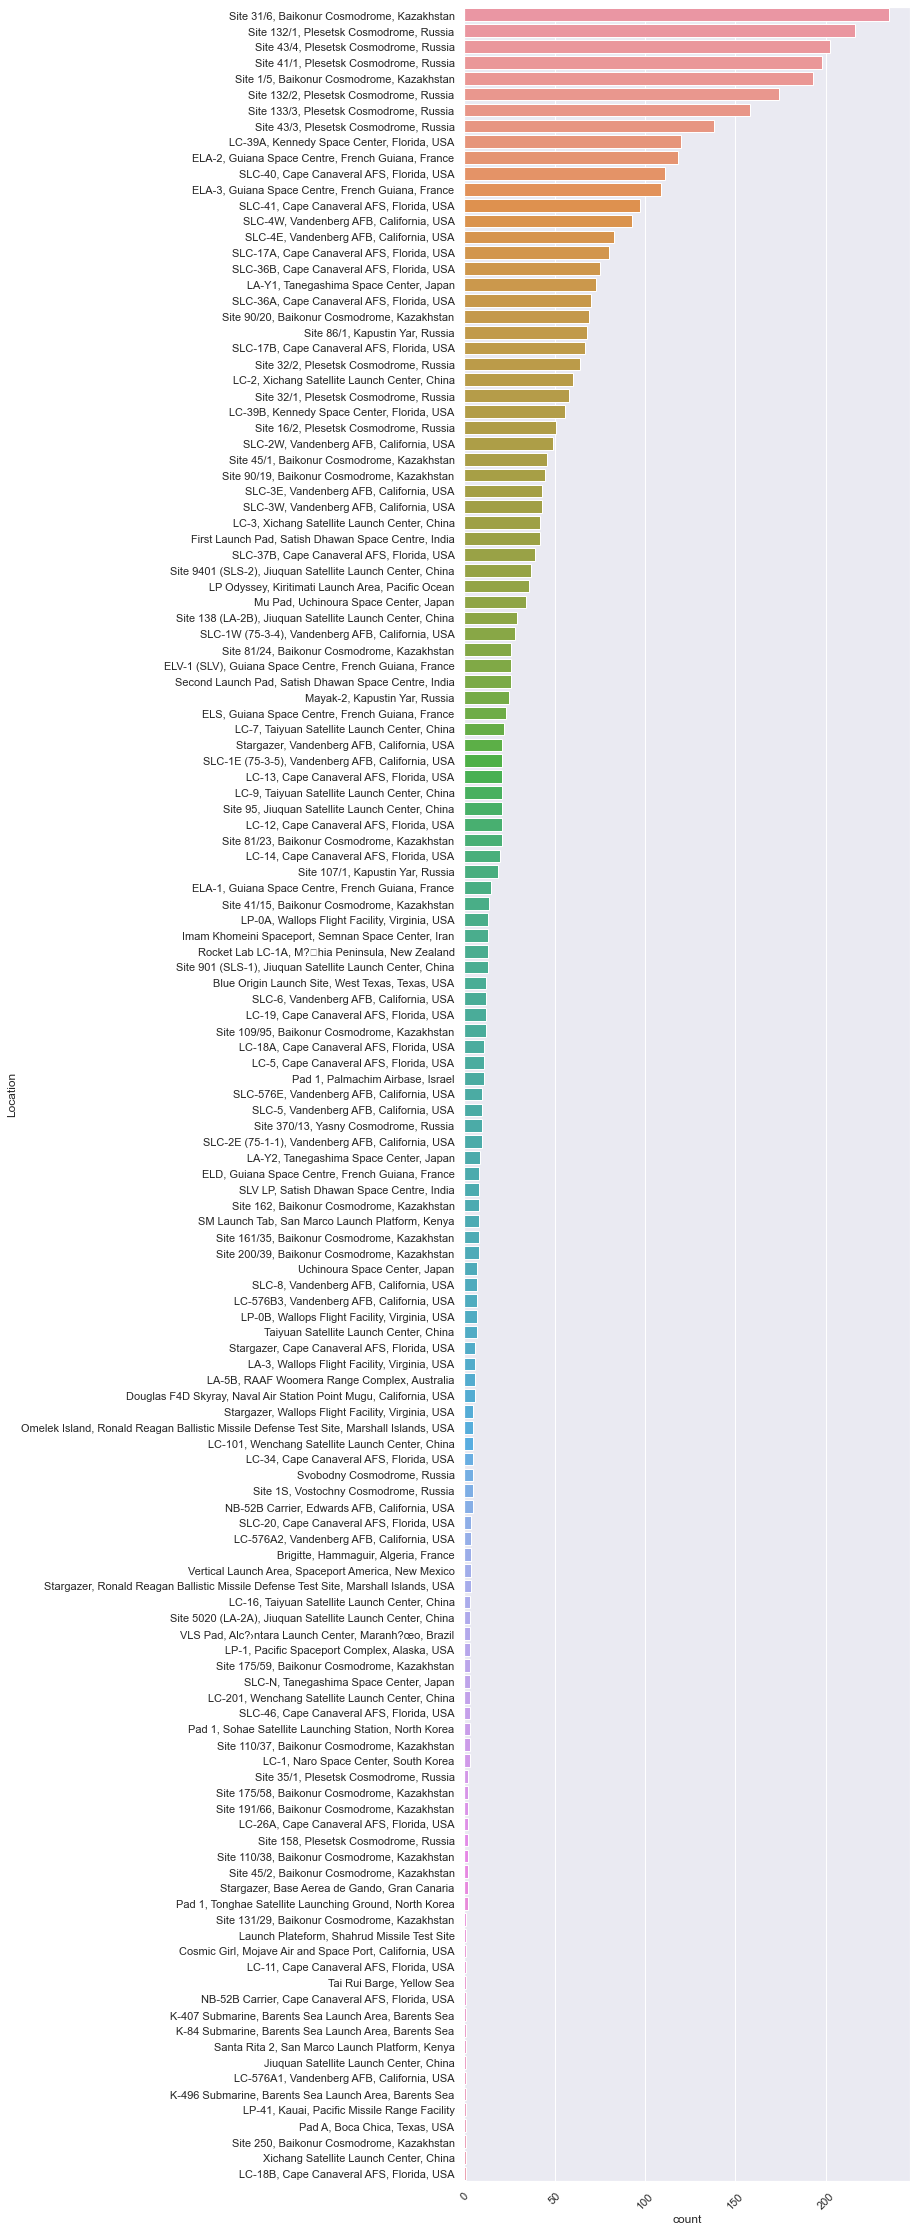

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,40))
plt.xticks(rotation=45)
ax = sns.countplot(y='Location',order=df_data['Location'].value_counts().index, data=df_data)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

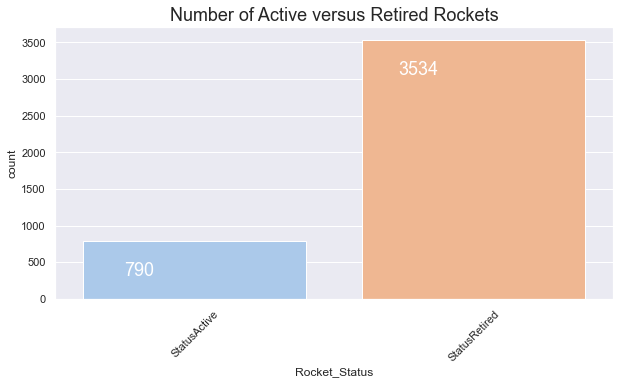

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
ax = sns.countplot(x='Rocket_Status', data=df_data,palette='pastel')
ax.axes.set_title("Number of Active versus Retired Rockets",fontsize=18)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

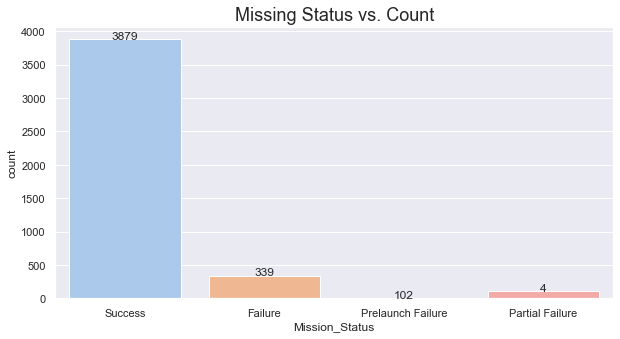

In [35]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=0)
ax = sns.countplot(x='Mission_Status', data=df_data, palette='pastel')
ax.axes.set_title("Missing Status vs. Count",fontsize=18)


i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_data['Mission_Status'].value_counts()[i],ha="center")
    i += 1


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

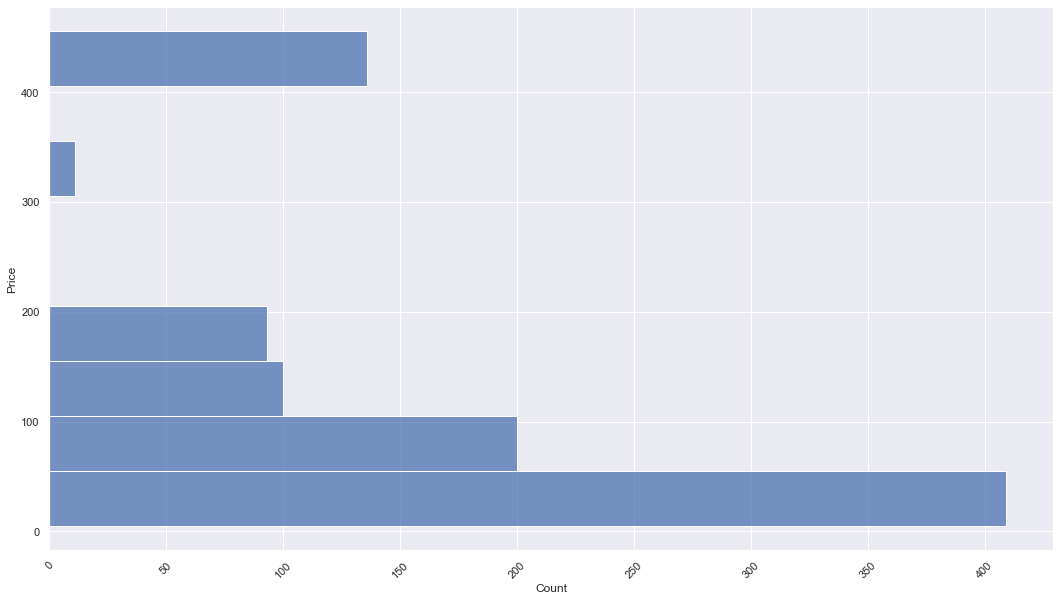

In [36]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=45)
ax.set(ylabel='Price (millions) ')
ax = sns.histplot(y='Price', data=df_data,binwidth=50,palette='pastel')



# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [37]:
#get the country codes
def iso(country):
    return countries.get(country).alpha3
df_data['ISO'] = df_data.Country.apply(lambda country:iso(country))

In [38]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Date Time,Year,Month,Day,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020,Aug,Fri,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,Aug,Thu,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,Aug,Tue,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020,Jul,Thu,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020,Jul,Thu,USA,USA


In [48]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [39]:
iso=df_data['ISO'].value_counts()
iso

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
UMI      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: ISO, dtype: int64

In [40]:
iso.index


Index(['RUS', 'USA', 'KAZ', 'FRA', 'CHN', 'JPN', 'IND', 'UMI', 'IRN', 'NZL',
       'ISR', 'KEN', 'AUS', 'PRK', 'KOR', 'BRA'],
      dtype='object')

In [41]:
iso.values


array([1398, 1351,  701,  303,  269,  126,   76,   36,   14,   13,   11,
          9,    6,    5,    3,    3])

In [46]:
px.choropleth(df_data, locations=iso.index, color=iso.values, hover_name=iso.index, title='Number of Lauches',
              color_continuous_scale="Viridis")

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

Text(0, 0.5, 'Number of Lanches')

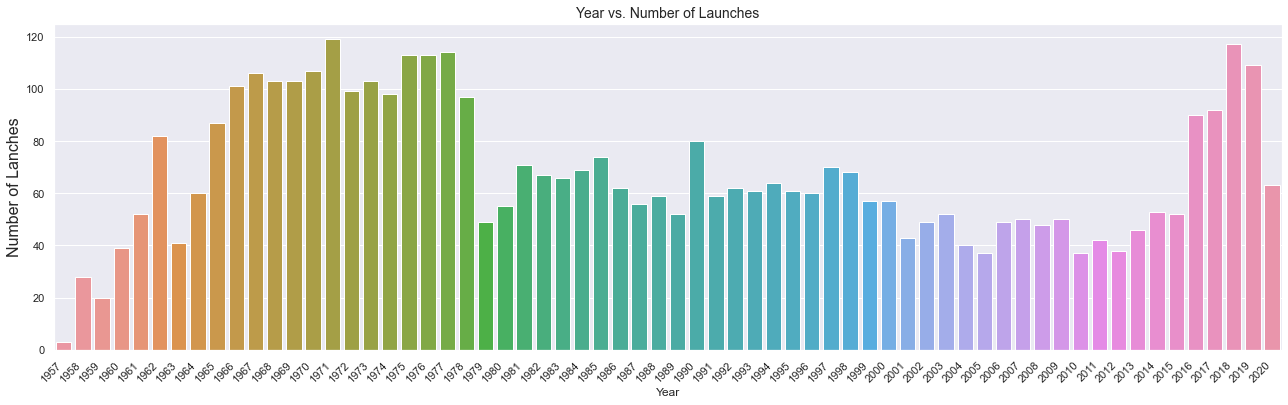

In [61]:
sns.set(style='darkgrid')
plt.figure(figsize=(22,6))
plt.xticks(rotation=45,ha='right')
ax = sns.countplot(x='Year', data=df_data)
ax.axes.set_title("Year vs. Number of Launches",fontsize=14)
ax.set_ylabel("Number of Lanches",fontsize=16)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

Text(0, 0.5, 'Number of Lanches')

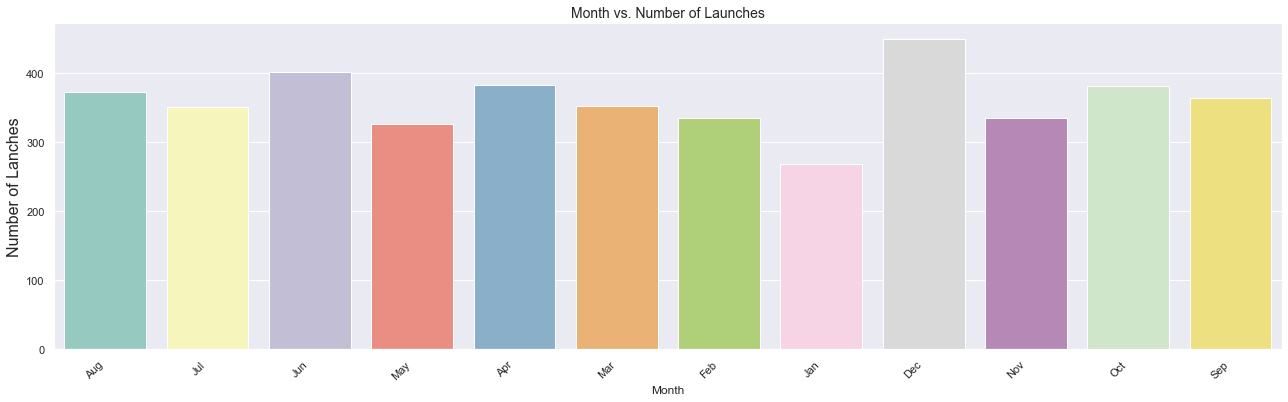

In [59]:
sns.set(style='darkgrid')
plt.figure(figsize=(22,6))
plt.xticks(rotation=45,ha='right')
ax = sns.countplot(x='Month', data=df_data,palette="Set3")
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_ylabel("Number of Lanches",fontsize=16)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

Text(0, 0.5, 'Number of Lanches')

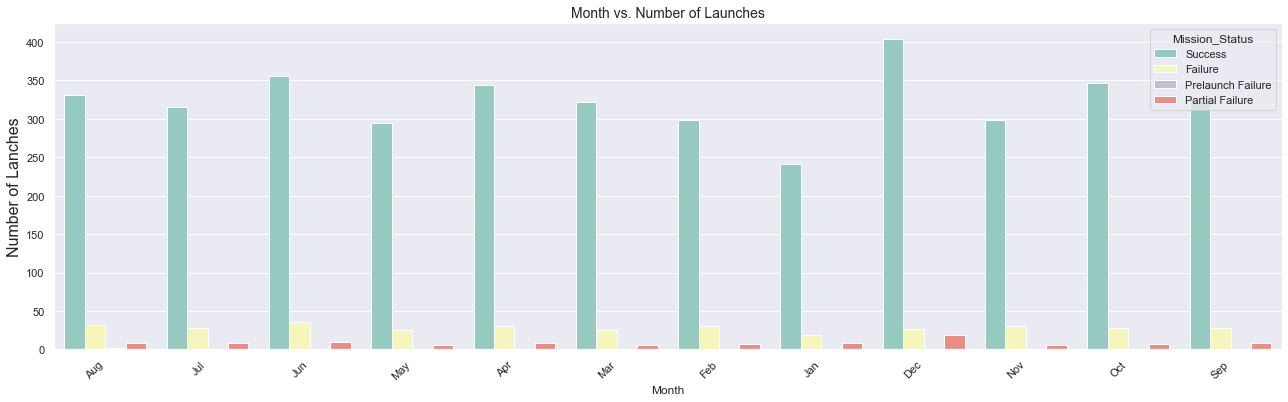

In [56]:
sns.set(style='darkgrid')
plt.figure(figsize=(22,6))
plt.xticks(rotation=45,ha='right')
ax = sns.countplot(x='Month', data=df_data,hue="Mission_Status",palette="Set3")
ax.axes.set_title("Month vs. Number of Launches",fontsize=14)
ax.set_ylabel("Number of Lanches",fontsize=16)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 